# MIP Models

In [1]:
import pyomo.environ as pyo
from jobshop.params import JobShopRandomParams
from jobshop.mip import DisjModel, TimeModel

In [2]:
# Instantiate random params of a 4x3 problem
params = JobShopRandomParams(3, 4, seed=12)

## Disjuntive model

$$
\begin{align}
    \text{min} \quad & C \\
    \text{s.t.} \quad & x_{\sigma_{h-1}^j, j} + p_{\sigma_{h-1}^j, j} \leq x_{\sigma_{h}^j, j}
        & \forall ~ j \in J; h \in (2, ..., |M|)\\
    & x_{m, j} + p_{m, j} \leq x_{m, k} + V (1 - z_{m, j, k})
        & \forall ~ j, k \in J, j \neq k; m \in M\\
    & z_{m, j, k} + z_{m, k, j} = 1
        & \forall ~ j, k \in J, j \neq k; m \in M\\
    & x_{\sigma_{|M|}^j, j} + p_{\sigma_{|M|}^j, j} \leq C
        & \forall ~ j \in J\\
    & x_{m, j} \geq 0 & \forall ~ j \in J; m \in M\\
    & z_{m, j, k} \in \{0, 1\} & \forall ~ j, k \in J; m \in M\\
\end{align}
$$

In [3]:
disj_model = DisjModel(params)

In [4]:
solver = pyo.SolverFactory("cbc", options=dict(cuts="on", sec=20))
res = solver.solve(disj_model, tee=False)
print(res)


Problem: 
- Name: unknown
  Lower bound: 48.0
  Upper bound: 48.0
  Number of objectives: 1
  Number of constraints: 48
  Number of variables: 31
  Number of binary variables: 48
  Number of integer variables: 48
  Number of nonzeros: 1
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.15
  Wallclock time: 0.15
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
    Black box: 
      Number of iterations: 0
  Error rc: 0
  Time: 0.25960540771484375
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



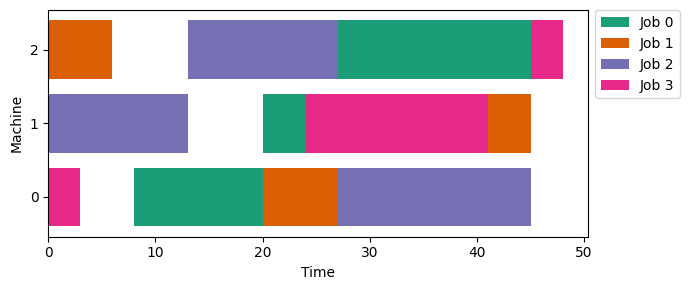

In [5]:
disj_model.plot()

## Time-indexed model

$$
\begin{align}
    \text{min} \quad & C \\
    \text{s.t.} \quad & \sum_{t \in T}{x_{m, j, t}} = 1
        & \forall ~ j \in J; m \in M \\
    & \sum_{j \in J}\sum_{t` \in (t - p_{m, j} + 1, ..., t )}x_{m, j, t`} \leq 1
        & \forall ~ m \in M; t \in T \\
    & \sum_{t \in T}{(t + p_{\sigma_{h - 1}^j, j}) x_{\sigma_{h - 1}^j, j, t}} \leq
    t x_{\sigma_{h}^j, j, t}
        & \forall ~ j \in J; h \in (1, 2, ..., |M|) \\
    & \sum_{t \in T}{(t + p_{m, j}) x_{m, j, t}} \leq C
        & \forall ~ j \in J; m \in M \\
    & x_{m, j, t} \in \{0, 1\} & \forall ~ j; m \in M; t \in T\\
\end{align}
$$

In [6]:
time_model = TimeModel(params)

In [7]:
res = solver.solve(time_model, tee=False)
print(res)

    containing a solution

Problem: 
- Name: unknown
  Lower bound: 46.0
  Upper bound: 50.0
  Number of objectives: 1
  Number of constraints: 381
  Number of variables: 1429
  Number of binary variables: 1428
  Number of integer variables: 1428
  Number of nonzeros: 1
  Sense: minimize
Solver: 
- Status: aborted
  User time: -1.0
  System time: 18.58
  Wallclock time: 18.58
  Termination condition: maxTimeLimit
  Termination message: Optimization terminated because the time expended exceeded the value specified in the seconds parameter.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 961
      Number of created subproblems: 961
    Black box: 
      Number of iterations: 38219
  Error rc: 0
  Time: 18.761165142059326
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



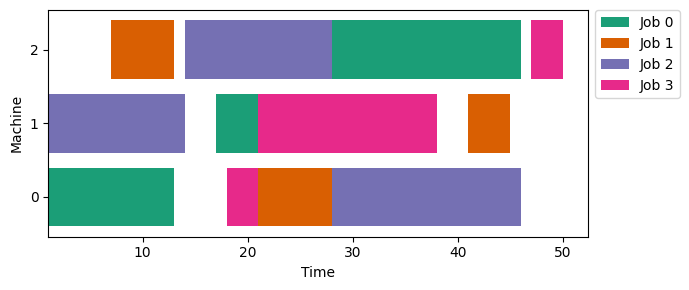

In [8]:
time_model.plot()